In [67]:
#import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl


from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)




%matplotlib inline

In [68]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import os
import tarfile
import urllib
#import pandas as pd
import pandas as pd
path = pd.read_csv("dallashouston 1.csv")


## Data Preparation

In [5]:
# print the first five rows
path.head()

,City,County,Crash_Year,Day_of_Week,Speed_Limit,TxDOT_Reportable_Flag,Weather_Condition,Weather,timeofday,Timeofday,...,Driver_License_Type,Unit_Death_Count,Vehicle_Body_Style,Vehicle_Color,Person_Age,Person_Ethnicity,Person_Gender,Person_Type,Person_Blood_Alcohol_ContentTest,Death_YorN
0,DALLAS,DALLAS,2017,SUNDAY,45.0,Yes,3 - RAIN,1,morning,0,...,4 - ID CARD,1,SV - SPORT UTILITY VEHICLE,BLACK,21,B - BLACK,1 - MALE,1 - DRIVER,0.000,1
1,DALLAS,DALLAS,2017,SUNDAY,65.0,Yes,6 - FOG,1,overnight,1,...,4 - ID CARD,0,"P4 - PASSENGER CAR, 4-DOOR",BROWN,28,B - BLACK,2 - FEMALE,1 - DRIVER,0.000,0
2,DALLAS,DALLAS,2017,SUNDAY,65.0,Yes,6 - FOG,1,overnight,1,...,1 - DRIVER LICENSE,1,NaN,NaN,23,B - BLACK,1 - MALE,4 - PEDESTRIAN,0.144,1
3,DALLAS,DALLAS,2017,SUNDAY,65.0,Yes,6 - FOG,1,overnight,1,...,1 - DRIVER LICENSE,0,SV - SPORT UTILITY VEHICLE,BLUE,25,W - WHITE,1 - MALE,1 - DRIVER,0.000,0
4,DALLAS,DALLAS,2017,MONDAY,40.0,Yes,1 - CLEAR,0,afternoon,0,...,4 - ID CARD,0,"P4 - PASSENGER CAR, 4-DOOR",WHITE,21,B - BLACK,2 - FEMALE,1 - DRIVER,0.000,0


In [6]:
# check the data types, in this case everything looks fine no changes need to be made.
path.dtypes

City                                 object
County                               object
Crash_Year                            int64
Day_of_Week                          object
Speed_Limit                         float64
TxDOT_Reportable_Flag                object
Weather_Condition                    object
Weather                               int64
timeofday                            object
Timeofday                             int64
Driver_Alcohol_Result                object
Driver_License_State                 object
Driver_License_Type                  object
Unit_Death_Count                      int64
Vehicle_Body_Style                   object
Vehicle_Color                        object
Person_Age                            int64
Person_Ethnicity                     object
Person_Gender                        object
Person_Type                          object
Person_Blood_Alcohol_ContentTest    float64
Death_YorN                            int64
dtype: object

In [7]:
path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11476 entries, 0 to 11475
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   City                              11476 non-null  object 
 1   County                            11476 non-null  object 
 2   Crash_Year                        11476 non-null  int64  
 3   Day_of_Week                       11476 non-null  object 
 4   Speed_Limit                       11420 non-null  float64
 5   TxDOT_Reportable_Flag             11476 non-null  object 
 6   Weather_Condition                 11464 non-null  object 
 7   Weather                           11476 non-null  int64  
 8   timeofday                         11476 non-null  object 
 9   Timeofday                         11476 non-null  int64  
 10  Driver_Alcohol_Result             11476 non-null  object 
 11  Driver_License_State              8680 non-null   object 
 12  Driv

In [8]:
df=path.copy()

In [9]:
df2 = df.drop(['County','Day_of_Week','TxDOT_Reportable_Flag', 'Weather_Condition','timeofday','Driver_Alcohol_Result','Driver_License_State','Driver_License_Type','Person_Type','Vehicle_Body_Style'], axis=1)
df2

,City,Crash_Year,Speed_Limit,Weather,Timeofday,Unit_Death_Count,Vehicle_Color,Person_Age,Person_Ethnicity,Person_Gender,Person_Blood_Alcohol_ContentTest,Death_YorN
0,DALLAS,2017,45.0,1,0,1,BLACK,21,B - BLACK,1 - MALE,0.000,1
1,DALLAS,2017,65.0,1,1,0,BROWN,28,B - BLACK,2 - FEMALE,0.000,0
2,DALLAS,2017,65.0,1,1,1,NaN,23,B - BLACK,1 - MALE,0.144,1
3,DALLAS,2017,65.0,1,1,0,BLUE,25,W - WHITE,1 - MALE,0.000,0
4,DALLAS,2017,40.0,0,0,0,WHITE,21,B - BLACK,2 - FEMALE,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11471,HOUSTON,2019,40.0,0,1,0,GRAY,39,B - BLACK,1 - MALE,0.000,0
11472,HOUSTON,2019,40.0,0,1,1,NaN,56,B - BLACK,1 - MALE,0.000,1
11473,HOUSTON,2019,30.0,0,1,1,BLUE,53,W - WHITE,1 - MALE,0.000,1
11474,HOUSTON,2019,35.0,0,1,1,SILVER,36,H - HISPANIC,1 - MALE,0.000,1


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11476 entries, 0 to 11475
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   City                              11476 non-null  object 
 1   Crash_Year                        11476 non-null  int64  
 2   Speed_Limit                       11420 non-null  float64
 3   Weather                           11476 non-null  int64  
 4   Timeofday                         11476 non-null  int64  
 5   Unit_Death_Count                  11476 non-null  int64  
 6   Vehicle_Color                     9692 non-null   object 
 7   Person_Age                        11476 non-null  int64  
 8   Person_Ethnicity                  11364 non-null  object 
 9   Person_Gender                     11476 non-null  object 
 10  Person_Blood_Alcohol_ContentTest  11476 non-null  float64
 11  Death_YorN                        11476 non-null  int64  
dtypes: f

In [11]:
df2.isnull().sum()

City                                   0
Crash_Year                             0
Speed_Limit                           56
Weather                                0
Timeofday                              0
Unit_Death_Count                       0
Vehicle_Color                       1784
Person_Age                             0
Person_Ethnicity                     112
Person_Gender                          0
Person_Blood_Alcohol_ContentTest       0
Death_YorN                             0
dtype: int64

In [12]:
#Deleting "Initial - " before the ethnicity
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.lstrip('B')
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.lstrip('H')
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.lstrip('W')
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.lstrip('I')
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.lstrip('A')
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.lstrip('98')
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.strip(' ')
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.lstrip('-')
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].str.strip(' ')

In [13]:
#Deleting "1 -" and "2 -" before Gender
df2['Person_Gender'] = df2['Person_Gender'].str.lstrip('1')
df2['Person_Gender'] = df2['Person_Gender'].str.lstrip('2')
df2['Person_Gender'] = df2['Person_Gender'].str.strip(' ')
df2['Person_Gender'] = df2['Person_Gender'].str.lstrip('-')
df2['Person_Gender'] = df2['Person_Gender'].str.strip(' ')

In [14]:
df2['Person_Ethnicity'].value_counts()

HISPANIC    4212
BLACK       3620
WHITE       2848
OTHER        372
ASIAN        296
AMER. IN      16
Name: Person_Ethnicity, dtype: int64

In [15]:
df2['Person_Gender'].value_counts()

MALE      8064
FEMALE    3412
Name: Person_Gender, dtype: int64

In [16]:
#Changing the data type of categorical variables
df2['City'] = df2.City.astype('category')
df2['Vehicle_Color'] = df2.Vehicle_Color.astype('category')
df2['Person_Ethnicity'] = df2.Person_Ethnicity.astype('category')
df2['Person_Gender'] = df2.Person_Gender.astype('category')
df2['Weather'] = df2.Weather.astype('category')
df2['Timeofday'] = df2.Timeofday.astype('category')
df2['Death_YorN'] = df2.Death_YorN.astype('category')

In [17]:
df2['Speed_Limit'] = df2['Speed_Limit'].fillna(df2['Speed_Limit'].mean())
df2['Vehicle_Color'] = df2['Vehicle_Color'].fillna(df2['Vehicle_Color'].value_counts().index[0])
df2['Person_Ethnicity'] = df2['Person_Ethnicity'].fillna(df2['Person_Ethnicity'].value_counts().index[0])

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11476 entries, 0 to 11475
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   City                              11476 non-null  category
 1   Crash_Year                        11476 non-null  int64   
 2   Speed_Limit                       11476 non-null  float64 
 3   Weather                           11476 non-null  category
 4   Timeofday                         11476 non-null  category
 5   Unit_Death_Count                  11476 non-null  int64   
 6   Vehicle_Color                     11476 non-null  category
 7   Person_Age                        11476 non-null  int64   
 8   Person_Ethnicity                  11476 non-null  category
 9   Person_Gender                     11476 non-null  category
 10  Person_Blood_Alcohol_ContentTest  11476 non-null  float64 
 11  Death_YorN                        11476 non-null  cate

In [19]:
#Splitting data between cities
Dallas = df2[df2['City'] == 'DALLAS']
Dallas.head()

Houston = df2[df2['City'] == 'HOUSTON']
Houston.head()

,City,Crash_Year,Speed_Limit,Weather,Timeofday,Unit_Death_Count,Vehicle_Color,Person_Age,Person_Ethnicity,Person_Gender,Person_Blood_Alcohol_ContentTest,Death_YorN
0,DALLAS,2017,45.0,1,0,1,BLACK,21,BLACK,MALE,0.000,1
1,DALLAS,2017,65.0,1,1,0,BROWN,28,BLACK,FEMALE,0.000,0
2,DALLAS,2017,65.0,1,1,1,WHITE,23,BLACK,MALE,0.144,1
3,DALLAS,2017,65.0,1,1,0,BLUE,25,WHITE,MALE,0.000,0
4,DALLAS,2017,40.0,0,0,0,WHITE,21,BLACK,FEMALE,0.000,0


,City,Crash_Year,Speed_Limit,Weather,Timeofday,Unit_Death_Count,Vehicle_Color,Person_Age,Person_Ethnicity,Person_Gender,Person_Blood_Alcohol_ContentTest,Death_YorN
5392,HOUSTON,2017,30.0,0,1,1,WHITE,24,HISPANIC,MALE,0.278,1
5393,HOUSTON,2017,40.0,0,0,1,WHITE,22,BLACK,MALE,0.000,1
5394,HOUSTON,2017,60.0,1,1,1,WHITE,30,BLACK,MALE,0.000,1
5395,HOUSTON,2017,60.0,1,1,1,YELLOW,32,WHITE,MALE,0.090,1
5396,HOUSTON,2017,60.0,1,1,0,WHITE,45,HISPANIC,MALE,0.000,0


## Data Exploration

/Users/bobbyfajardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/bobbyfajardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


                       Dallas Dataset


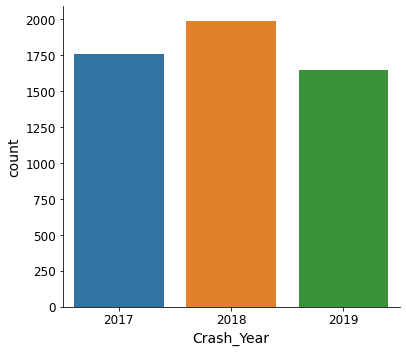

In [20]:
import seaborn as sns
sns.factorplot(x='Crash_Year',data=Dallas,kind='count',size=5,aspect=1.1)
print("                       Dallas Dataset")

                       Houston Dataset


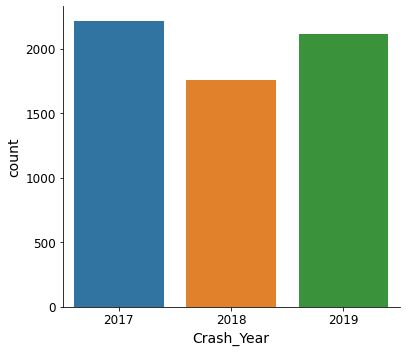

In [21]:
sns.factorplot(x='Crash_Year',data=Houston,kind='count',size=5,aspect=1.1)
print("                       Houston Dataset")

                             Dallas Dataset


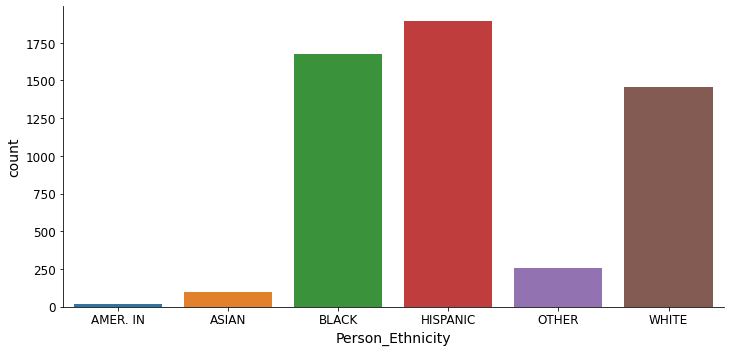

In [22]:
sns.factorplot(x='Person_Ethnicity',data=Dallas,kind='count',size=5,aspect=2)
print("                             Dallas Dataset")

                             Houston Dataset


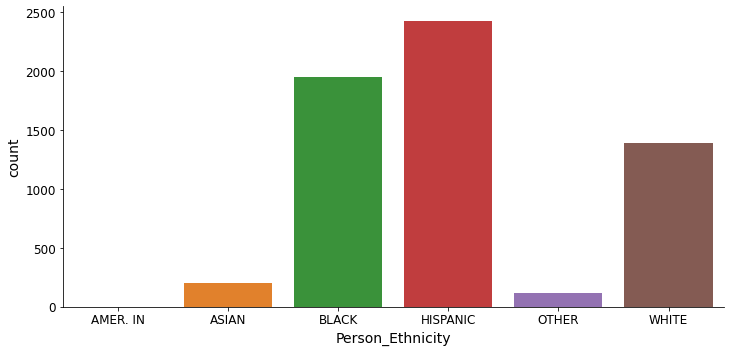

In [23]:
sns.factorplot(x='Person_Ethnicity',data=Houston,kind='count',size=5,aspect=2)
print("                             Houston Dataset")

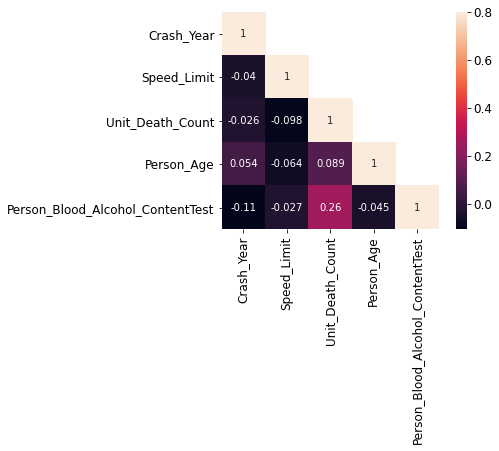

In [100]:
# Finding the relations between the variables.

#heatmap_Dallas = Dallas[['City','Crash_Year','Speed_Limit','Weather','Timeofday','Unit_Death_Count','Vehicle_Color','Person_Age','Person_Ethnicity','Person_Gender', 'Person_Blood_Alcohol_ContentTest', 'Death_YorN']]
#heatmap_Dallas.head()

# Finding the relations between the variables.
#plt.figure(figsize=(40,20))
#c= heatmap_Dallas.corr()
#sns.heatmap(c,cmap='BrBG',annot=True)
#c

heatmap_Dallas = Dallas[['City','Crash_Year','Speed_Limit','Weather','Timeofday','Unit_Death_Count',
                           'Vehicle_Color','Person_Age','Person_Ethnicity','Person_Gender', 'Person_Blood_Alcohol_ContentTest', 'Death_YorN']].corr()

#heatmap_Houston.head()


 

mask = np.array(heatmap_Dallas)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(heatmap_Dallas, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

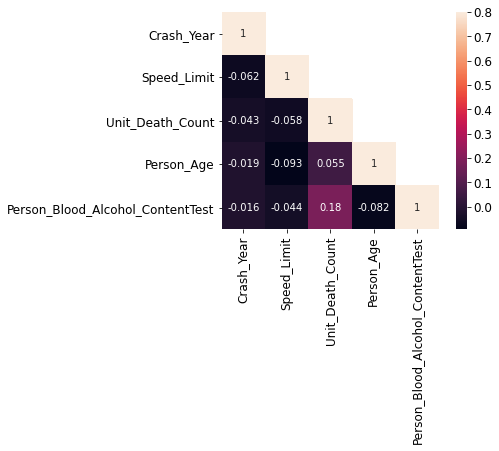

In [101]:
# Finding the relations between the variables.

heatmap_Houston = Houston[['City','Crash_Year','Speed_Limit','Weather','Timeofday','Unit_Death_Count',
                           'Vehicle_Color','Person_Age','Person_Ethnicity','Person_Gender', 'Person_Blood_Alcohol_ContentTest', 'Death_YorN']].corr()

#heatmap_Houston.head()


 

mask = np.array(heatmap_Houston)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(heatmap_Houston, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

# Finding the relations between the variables.
#plt.figure(figsize=(40,20))
#c= heatmap_Houston.corr()
#sns.heatmap(c,cmap='BrBG',annot=True)
#c

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135fe1f40>,
      dtype=object)

Saving figure Dallas_attribute_histogram_plots


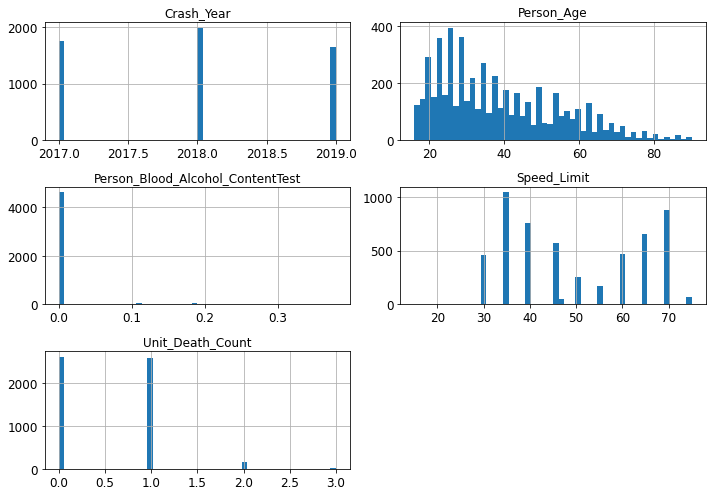

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
Dallas.hist(bins=50, figsize=(10,7))
save_fig("Dallas_attribute_histogram_plots")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1356a8dc0>,
      dtype=object)

Saving figure Houston_attribute_histogram_plots


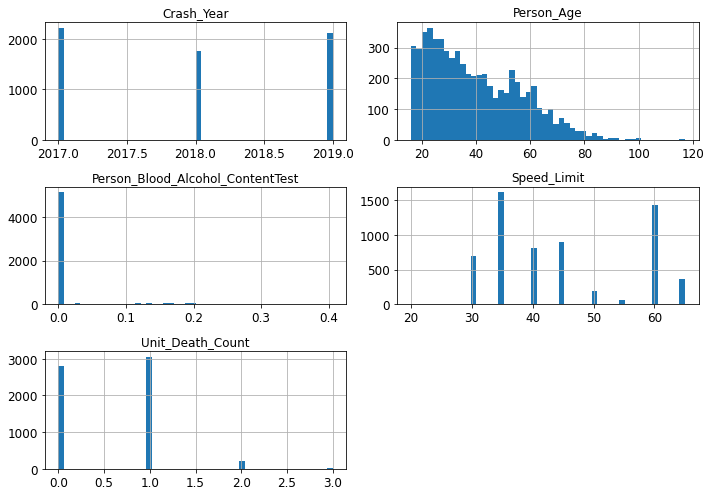

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
Houston.hist(bins=50, figsize=(10,7))
save_fig("Houston_attribute_histogram_plots")
plt.show()

(array([1068., 1164.,  912.,  624.,  484.,  528.,  316.,  176.,   72.,
          48.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Person_Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Dallas Accident Age Range')

([<matplotlib.axis.YTick at 0x131385c40>,
 <a list of 6 Text major ticklabel objects>)

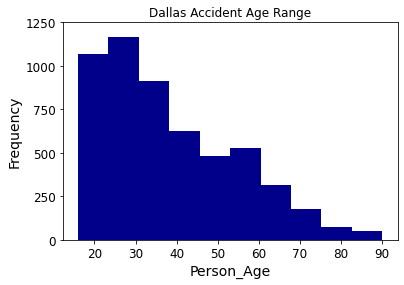

In [83]:
Dallas_Person_Age  = Dallas['Person_Age']
#To plot 'Value'
plt.hist(Dallas_Person_Age,10,facecolor='darkblue')    #  (dataframe,no. of bins, color)

plt.xlabel('Person_Age')
plt.ylabel('Frequency')
plt.title('Dallas Accident Age Range')
plt.yticks(np.arange(0, 1500, 250))

(array([1644., 1420., 1028.,  868.,  660.,  320.,  104.,   24.,   12.,
           4.]),
 array([ 16. ,  26.1,  36.2,  46.3,  56.4,  66.5,  76.6,  86.7,  96.8,
        106.9, 117. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Person_Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Houston Accident Age Range')

([<matplotlib.axis.YTick at 0x11abe7b50>,
 <a list of 6 Text major ticklabel objects>)

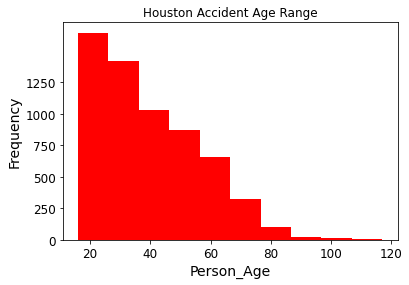

In [84]:
Houston_Person_Age = Houston['Person_Age']
#To plot 'Value'
plt.hist(Houston_Person_Age,10,facecolor='red')    #  (dataframe,no. of bins, color)

plt.xlabel('Person_Age')
plt.ylabel('Frequency')
plt.title('Houston Accident Age Range')
plt.yticks(np.arange(0, 1500, 250))

(array([1584.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3808.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Dallas Time of Day: 1 is Night and 0 is Day')

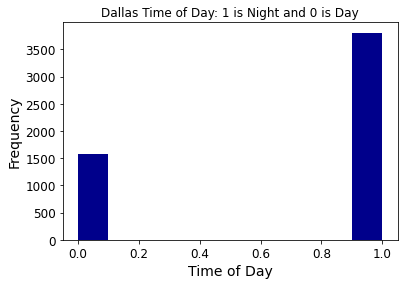

In [112]:
#Dallas["Crash_Time"].hist()
plt.hist(Dallas["Timeofday"], color = "darkblue", lw=0)

plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Dallas Time of Day: 1 is Night and 0 is Day')

(array([2112.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3972.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Houston Time of Day: 1 is Night and 0 is Day')

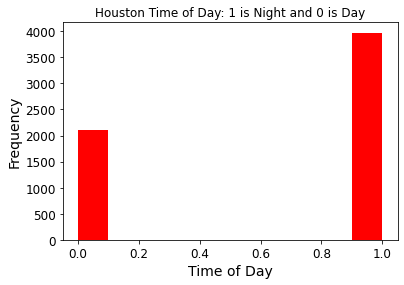

In [113]:
#Houston["Crash_Time"].hist()


plt.hist(Houston["Timeofday"], color = "red", lw=0)

plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Houston Time of Day: 1 is Night and 0 is Day')


In [51]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)


Text(0.5, 1.0, 'Dallas: Person Age and Gender')

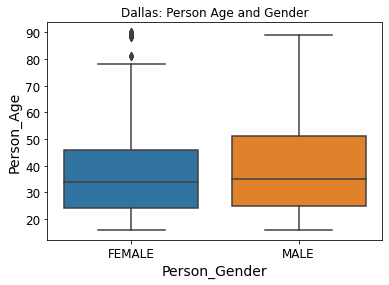

In [114]:
#Detecting Outliers for Person
sns.boxplot(x=Dallas['Person_Gender'], y=Dallas['Person_Age'])
plt.title('Dallas: Person Age and Gender')

Text(0.5, 1.0, 'Dallas: Person Age and Ethnicity')

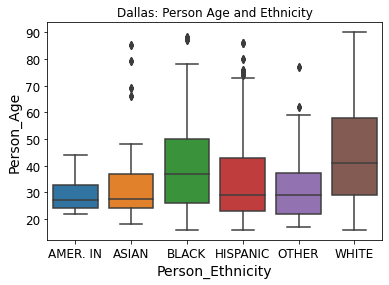

In [115]:
sns.boxplot(x=Dallas['Person_Ethnicity'], y=Dallas['Person_Age'])
plt.title('Dallas: Person Age and Ethnicity')

Text(0.5, 1.0, 'Houston: Person Age and Gender')

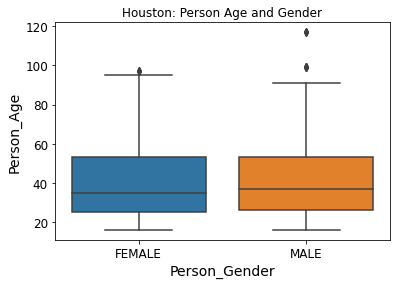

In [116]:
sns.boxplot(x=Houston['Person_Gender'], y=Houston['Person_Age'])
plt.title('Houston: Person Age and Gender')

Text(0.5, 1.0, 'Houston: Person Age and Ethnicity')

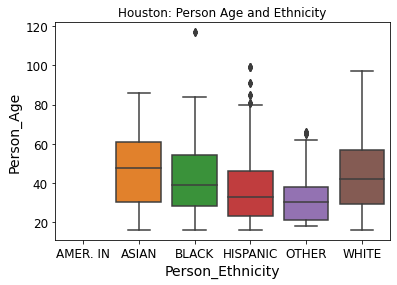

In [117]:
sns.boxplot(x=Houston['Person_Ethnicity'], y=Houston['Person_Age'])
plt.title('Houston: Person Age and Ethnicity')

## Feature Engineering

##### Dummy coding

In [58]:
# Transform the dummy variables for Dallas; dropping one to get n-1 dummy variables for model fitting
dummy_cols =['Vehicle_Color', 'Person_Ethnicity', 'Person_Gender']
dallas = pd.get_dummies(Dallas, columns=dummy_cols, drop_first = True)
dallas.head()

,City,Crash_Year,Speed_Limit,Weather,Timeofday,Unit_Death_Count,Person_Age,Person_Blood_Alcohol_ContentTest,Death_YorN,Vehicle_Color_BLACK,...,Vehicle_Color_RED,Vehicle_Color_SILVER,Vehicle_Color_WHITE,Vehicle_Color_YELLOW,Person_Ethnicity_ASIAN,Person_Ethnicity_BLACK,Person_Ethnicity_HISPANIC,Person_Ethnicity_OTHER,Person_Ethnicity_WHITE,Person_Gender_MALE
0,DALLAS,2017,45.0,1,0,1,21,0.000,1,1,...,0,0,0,0,0,1,0,0,0,1
1,DALLAS,2017,65.0,1,1,0,28,0.000,0,0,...,0,0,0,0,0,1,0,0,0,0
2,DALLAS,2017,65.0,1,1,1,23,0.144,1,0,...,0,0,1,0,0,1,0,0,0,1
3,DALLAS,2017,65.0,1,1,0,25,0.000,0,0,...,0,0,0,0,0,0,0,0,1,1
4,DALLAS,2017,40.0,0,0,0,21,0.000,0,0,...,0,0,1,0,0,1,0,0,0,0


In [59]:
#We don't need the city variable anymore
dallas_data = dallas.drop('City', axis=1)
dallas_data.head()
len(dallas_data)

,Crash_Year,Speed_Limit,Weather,Timeofday,Unit_Death_Count,Person_Age,Person_Blood_Alcohol_ContentTest,Death_YorN,Vehicle_Color_BLACK,Vehicle_Color_BLUE,...,Vehicle_Color_RED,Vehicle_Color_SILVER,Vehicle_Color_WHITE,Vehicle_Color_YELLOW,Person_Ethnicity_ASIAN,Person_Ethnicity_BLACK,Person_Ethnicity_HISPANIC,Person_Ethnicity_OTHER,Person_Ethnicity_WHITE,Person_Gender_MALE
0,2017,45.0,1,0,1,21,0.000,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,2017,65.0,1,1,0,28,0.000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,65.0,1,1,1,23,0.144,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2017,65.0,1,1,0,25,0.000,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2017,40.0,0,0,0,21,0.000,0,0,0,...,0,0,1,0,0,1,0,0,0,0


5392

In [26]:
# Transform the dummy variables for Houston; dropping one to get n-1 dummy variables for model fitting
dummy_cols =['Vehicle_Color', 'Person_Ethnicity', 'Person_Gender']
houston = pd.get_dummies(Houston, columns=dummy_cols, drop_first = True)
houston.head()

,City,Crash_Year,Speed_Limit,Weather,Timeofday,Unit_Death_Count,Person_Age,Person_Blood_Alcohol_ContentTest,Death_YorN,Vehicle_Color_BLACK,...,Vehicle_Color_RED,Vehicle_Color_SILVER,Vehicle_Color_WHITE,Vehicle_Color_YELLOW,Person_Ethnicity_ASIAN,Person_Ethnicity_BLACK,Person_Ethnicity_HISPANIC,Person_Ethnicity_OTHER,Person_Ethnicity_WHITE,Person_Gender_MALE
5392,HOUSTON,2017,30.0,0,1,1,24,0.278,1,0,...,0,0,1,0,0,0,1,0,0,1
5393,HOUSTON,2017,40.0,0,0,1,22,0.000,1,0,...,0,0,1,0,0,1,0,0,0,1
5394,HOUSTON,2017,60.0,1,1,1,30,0.000,1,0,...,0,0,1,0,0,1,0,0,0,1
5395,HOUSTON,2017,60.0,1,1,1,32,0.090,1,0,...,0,0,0,1,0,0,0,0,1,1
5396,HOUSTON,2017,60.0,1,1,0,45,0.000,0,0,...,0,0,1,0,0,0,1,0,0,1


In [27]:
houston_data = houston.drop('City', axis=1)
houston_data.head()
len(houston_data)

,Crash_Year,Speed_Limit,Weather,Timeofday,Unit_Death_Count,Person_Age,Person_Blood_Alcohol_ContentTest,Death_YorN,Vehicle_Color_BLACK,Vehicle_Color_BLUE,...,Vehicle_Color_RED,Vehicle_Color_SILVER,Vehicle_Color_WHITE,Vehicle_Color_YELLOW,Person_Ethnicity_ASIAN,Person_Ethnicity_BLACK,Person_Ethnicity_HISPANIC,Person_Ethnicity_OTHER,Person_Ethnicity_WHITE,Person_Gender_MALE
5392,2017,30.0,0,1,1,24,0.278,1,0,0,...,0,0,1,0,0,0,1,0,0,1
5393,2017,40.0,0,0,1,22,0.000,1,0,0,...,0,0,1,0,0,1,0,0,0,1
5394,2017,60.0,1,1,1,30,0.000,1,0,0,...,0,0,1,0,0,1,0,0,0,1
5395,2017,60.0,1,1,1,32,0.090,1,0,0,...,0,0,0,1,0,0,0,0,1,1
5396,2017,60.0,1,1,0,45,0.000,0,0,0,...,0,0,1,0,0,0,1,0,0,1


6084

In [60]:
## DALLAS DATASET
## Converting categorical variables to numeric for regression
dallas_data['Weather'] = dallas_data.Weather.astype('uint8')
dallas_data['Timeofday'] = dallas_data.Timeofday.astype('uint8')
dallas_data['Death_YorN'] = dallas_data.Death_YorN.astype('uint8')

In [61]:
## HOUSTON DATASET
## Converting categorical variables to numeric for regression
houston_data['Weather'] = houston_data.Weather.astype('uint8')
houston_data['Timeofday'] = houston_data.Timeofday.astype('uint8')
houston_data['Death_YorN'] = houston_data.Death_YorN.astype('uint8')

### Predictive Modeling

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
**************************  Linear Regression  **************************</p>

##### Train-Test Split

In [62]:
# DALLAS DATASET
## generate the independent variable and dependent variable
X_dallas = dallas_data.drop(['Unit_Death_Count','Death_YorN'], axis = 1)
y_dallas = dallas_data['Unit_Death_Count']
## generate train and test datasets
from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d=train_test_split(X_dallas, y_dallas, test_size=0.2,random_state=42)

In [63]:
# HOUSTON DATASET
## generate the independent variable and dependent variable
X_houston = houston_data.drop(['Unit_Death_Count','Death_YorN'], axis = 1)
y_houston = houston_data['Unit_Death_Count']
## generate train and test datasets
from sklearn.model_selection import train_test_split
X_train_h, X_test_h, y_train_h, y_test_h=train_test_split(X_houston, y_houston, test_size=0.2,random_state=42)

###### DALLAS DATASET

In [32]:
# DALLAS DATASET
## fit linear model on training dataset
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_d, y_train_d)

## predicting with the test dataset
y_prediction_d=regressor.predict(X_test_d)
y_prediction_d
y_prediction_d.shape

LinearRegression()

array([0.52254191, 0.38669586, 0.39413357, ..., 0.73090439, 0.77014601,
       0.47801741])

(1079,)

In [33]:
# DALLAS REGRESSION SUMMARY
# For better interpretation of linear regression model, consider statsmodels package
import statsmodels.api as sm

# Add a constant
X_train_d = sm.add_constant(X_train_d)

# Fit and summarize OLS model
mod = sm.OLS(y_train_d, X_train_d)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Unit_Death_Count   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     18.26
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.30e-73
Time:                        21:00:02   Log-Likelihood:                -3539.6
No. Observations:                4313   AIC:                             7129.
Df Residuals:                    4288   BIC:                             7289.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

##### HOUSTON DATASET

In [34]:
## predicting with the test dataset
y_prediction_h=regressor.predict(X_test_h)
y_prediction_h
y_prediction_h.shape

array([0.6470531 , 1.1594512 , 0.48702579, ..., 0.59118217, 0.61173826,
       0.6620674 ])

(1217,)

In [35]:
# HOUSTON REGRESSION SUMMARY
# For better interpretation of linear regression model, consider statsmodels package
import statsmodels.api as sm

# Add a constant
X_train_h = sm.add_constant(X_train_h)

# Fit and summarize OLS model
mod = sm.OLS(y_train_h, X_train_h)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Unit_Death_Count   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     16.91
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           2.64e-65
Time:                        21:00:02   Log-Likelihood:                -4082.4
No. Observations:                4867   AIC:                             8213.
Df Residuals:                    4843   BIC:                             8369.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

##### RMSE: DALLAS vs HOUSTON

In [36]:
### Calculate RootMSE
#DALLAS
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSElinear_d=sqrt(mean_squared_error(y_true=y_test_d,y_pred=y_prediction_d))
print("Dallas RMSE:", RMSElinear_d)

Dallas RMSE: 0.5449590434056079


In [37]:
RMSElinear_h=sqrt(mean_squared_error(y_true=y_test_h,y_pred=y_prediction_h))
print("Houston RMSE:", RMSElinear_h)

Houston RMSE: 0.5836733260075452


#### Evaluation Using Cross-Validation: DALLAS vs HOUSTON

In [38]:
from sklearn.model_selection import cross_val_score
scores_d = cross_val_score(regressor, X_train_d, y_train_d, scoring="neg_mean_squared_error", cv=5)
d_rmse_scores = np.sqrt(-scores_d)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print("********DALLAS********")    
display_scores(d_rmse_scores)

********DALLAS********
Scores: [0.57234609 0.55854014 0.54021685 0.54104613 0.55503445]
Mean: 0.5534367302317309
Standard deviation: 0.011953688545891924


In [40]:
scores_h = cross_val_score(regressor, X_train_h, y_train_h, scoring="neg_mean_squared_error", cv=5)
h_rmse_scores = np.sqrt(-scores_h)

In [41]:
print("*********HOUSTON********")
display_scores(h_rmse_scores)

*********HOUSTON********
Scores: [0.56383655 0.56936412 0.54915874 0.56914135 0.5648962 ]
Mean: 0.5632793926641184
Standard deviation: 0.00739869834936592


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
**************************  Logistic Regression  **************************</p>

##### Train-Test Split

In [42]:
# DALLAS DATASET
## generate the independent variable and dependent variable
X_dallas_2 = dallas_data.drop(['Unit_Death_Count','Death_YorN'], axis = 1)
y_dallas_2 = dallas_data['Death_YorN']
## generate train and test datasets
from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl=train_test_split(X_dallas_2, y_dallas_2, test_size=0.2,random_state=42)

In [43]:
# HOUSTON DATASET
## generate the independent variable and dependent variable
X_houston_2 = houston_data.drop(['Unit_Death_Count','Death_YorN'], axis = 1)
y_houston_2 = houston_data['Death_YorN']
## generate train and test datasets
from sklearn.model_selection import train_test_split
X_train_hl, X_test_hl, y_train_hl, y_test_hl=train_test_split(X_houston_2, y_houston_2, test_size=0.2,random_state=42)

###### DALLAS DATASET

In [44]:
log_reg_d = sm.Logit(y_train_dl, X_train_dl).fit()

Optimization terminated successfully.
         Current function value: 40.889929
         Iterations 7


In [45]:
print(log_reg_d.summary())

                           Logit Regression Results                           
Dep. Variable:             Death_YorN   No. Observations:                 4313
Model:                          Logit   Df Residuals:                     4289
Method:                           MLE   Df Model:                           23
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                     inf
Time:                        21:00:10   Log-Likelihood:            -1.7636e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Crash_Year                          -0.0005      0.000     -1.214      0.225      -0.001       0.000
Speed_Limit                         -0.0142      0.002     -6.154

/Users/bobbyfajardo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/bobbyfajardo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/bobbyfajardo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [46]:
# performing predictions on the test datdaset 
yhat_d = log_reg_d.predict(X_test_dl) 
prediction_d = list(map(round, yhat_d)) 
  
# comparing original and predicted values of y 
#print('Acutal values', list(y_test_dl.values)) 
#print('Predictions :', prediction_d) 

# Odds Ratio Estimates - Dallas

In [47]:
estimates = log_reg_d.params
intervals = log_reg_d.conf_int()
intervals['Odds Ratio'] = estimates
intervals.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(intervals))

                                             5%           95%    Odds Ratio
Crash_Year                             0.998665  1.000314e+00  9.994893e-01
Speed_Limit                            0.981399  9.903417e-01  9.858603e-01
Weather                                0.885282  1.178899e+00  1.021596e+00
Timeofday                              0.800040  1.070743e+00  9.255474e-01
Person_Age                             1.011082  1.019615e+00  1.015340e+00
Person_Blood_Alcohol_ContentTest  727642.230612  4.410245e+07  5.664874e+06
Vehicle_Color_BLACK                    0.351987  1.229846e+00  6.579434e-01
Vehicle_Color_BLUE                     0.480887  1.735236e+00  9.134838e-01
Vehicle_Color_BROWN                    0.145590  8.715789e-01  3.562208e-01
Vehicle_Color_GOLD                     0.339859  1.445399e+00  7.008791e-01
Vehicle_Color_GRAY                     0.364643  1.301531e+00  6.889078e-01
Vehicle_Color_GREEN                    0.490311  2.050029e+00  1.002573e+00
Vehicle_Colo

##### HOUSTON DATASET

In [48]:
log_reg_h = sm.Logit(y_train_hl, X_train_hl).fit()

Optimization terminated successfully.
         Current function value: 32.874581
         Iterations 7


In [49]:
print(log_reg_h.summary())

                           Logit Regression Results                           
Dep. Variable:             Death_YorN   No. Observations:                 4867
Model:                          Logit   Df Residuals:                     4843
Method:                           MLE   Df Model:                           23
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                     inf
Time:                        21:00:13   Log-Likelihood:            -1.6000e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Crash_Year                          -0.0681      0.036     -1.872      0.061      -0.139       0.003
Speed_Limit                         -0.0078      0.003     -2.906

/Users/bobbyfajardo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/bobbyfajardo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/bobbyfajardo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [50]:
# performing predictions on the test datdaset 
yhat_h = log_reg_h.predict(X_test_hl) 
prediction_h = list(map(round, yhat_h)) 

# Odds Ratio Estimates - Houston

In [51]:
estimates = log_reg_h.params
intervals = log_reg_h.conf_int()
intervals['Odds Ratio'] = estimates
intervals.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(intervals))

                                           5%            95%    Odds Ratio
Crash_Year                           0.869878   1.003222e+00  9.341737e-01
Speed_Limit                          0.986990   9.974581e-01  9.922103e-01
Weather                              0.892467   1.168989e+00  1.021413e+00
Timeofday                            0.887773   1.147335e+00  1.009244e+00
Person_Age                           1.010568   1.018136e+00  1.014345e+00
Person_Blood_Alcohol_ContentTest  1253.101734   1.592338e+04  4.466947e+03
Vehicle_Color_BLACK                  1.722677   5.958329e+00  3.203791e+00
Vehicle_Color_BLUE                   1.041295   3.777256e+00  1.983239e+00
Vehicle_Color_BROWN                  0.792463   4.871651e+00  1.964841e+00
Vehicle_Color_GOLD                   1.405355   6.268371e+00  2.968044e+00
Vehicle_Color_GRAY                   0.918177   3.263992e+00  1.731162e+00
Vehicle_Color_GREEN                  1.803445   8.459366e+00  3.905893e+00
Vehicle_Color_MAROON     

##### DALLAS: Accuracy & Confusion Matrix

In [52]:
# Testing the accuracy of the model
from sklearn.metrics import (confusion_matrix, accuracy_score) 
  
# confusion matrix
print ("Confusion Matrix :")
confusion_matrix(y_true=y_test_dl, y_pred=prediction_d)    
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test_d, prediction_d))

Confusion Matrix :


array([[372, 162],
       [212, 333]])

Test accuracy =  0.6311399443929564


In [53]:
# label the confusion matrix
labels = [1,0]
cm_d = confusion_matrix(y_true=y_test_dl, y_pred=prediction_d, labels=labels)

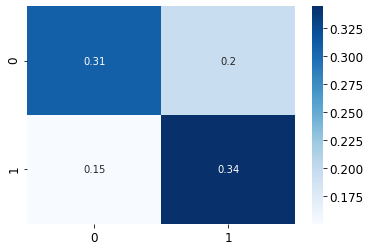

In [54]:
# To plot it using seaborn package
sns.heatmap(cm_d/np.sum(cm_d), annot=True, cmap='Blues')

##### HOUSTON: Accuracy & Confusion Matrix

In [64]:
# confusion matrix
print ("Confusion Matrix :")
confusion_matrix(y_true=y_test_hl, y_pred=prediction_h)    
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test_h, prediction_h))

Confusion Matrix :


array([[284, 246],
       [235, 452]])

Test accuracy =  0.5883319638455218


In [65]:
# label the confusion matrix
labels = [1,0]
cm_h = confusion_matrix(y_true=y_test_hl, y_pred=prediction_h, labels=labels)

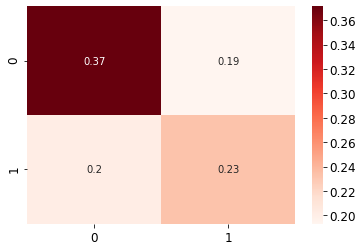

In [66]:
# To plot it using seaborn package
sns.heatmap(cm_h/np.sum(cm_h), annot=True, cmap='Reds')